## Talle 7 puntos 1,2,3,5

Empecemos importando numpy, pandas, keras, tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

2024-09-30 22:24:25.283930: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
# Set the environment flag for determinism
tf.config.experimental.enable_op_determinism()

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [3]:
df = pd.read_csv('heart.csv')

Exploremos las primeras filas del dataframe.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Descripción de las variables:

https://archive.ics.uci.edu/dataset/45/heart+disease


Exploremos el tamaño del df

In [5]:
df.shape

(303, 14)

Identificamos NAs en los datos

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Definimos listas para las variables categóricas enteras, categóricas string y numéricas.

In [7]:
## Reducimos el numero de variables categoricas a 4
cat_int_feats = ['sex', 'cp', 'fbs', 'exang']

In [8]:
cat_str_feats = ['thal']

In [9]:
# Reducimos el numero de variables numericas a 4
num_feats = ['age', 'chol', 'oldpeak', 'slope']

Agregamos las listas de categorías

In [10]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

Reordenamos el dataframe de acuerdo con el tipo de variable

In [11]:
df = df[feats_ordered+['target']]

In [12]:
df.head()

,sex,cp,fbs,exang,thal,age,chol,oldpeak,slope,target
0,1,1,1,0,fixed,63,233,2.3,3,0
1,1,4,0,1,normal,67,286,1.5,2,1
2,1,4,0,1,reversible,67,229,2.6,2,0
3,1,3,0,0,normal,37,250,3.5,3,0
4,0,2,0,0,normal,41,204,1.4,1,0


In [13]:
df.columns

Index(['sex', 'cp', 'fbs', 'exang', 'thal', 'age', 'chol', 'oldpeak', 'slope',
       'target'],
      dtype='object')

In [14]:
df["target"].unique()

array([0, 1])

In [15]:
df.dtypes

sex          int64
cp           int64
fbs          int64
exang        int64
thal        object
age          int64
chol         int64
oldpeak    float64
slope        int64
target       int64
dtype: object

Separamos los datos en entrenamiento, validación y prueba

In [16]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,sex,cp,fbs,exang,thal,age,chol,oldpeak,slope,target
69,0,4,0,0,normal,35,183,1.4,1,0
300,1,4,0,0,reversible,65,254,2.8,2,1
220,1,1,0,0,normal,59,204,0.8,1,0
134,1,3,1,0,reversible,42,240,0.8,3,0
7,0,4,0,1,normal,57,354,0.6,1,0


In [17]:
train.shape

(242, 10)

In [18]:
test = df.drop(train.index)
test.head()

,sex,cp,fbs,exang,thal,age,chol,oldpeak,slope,target
0,1,1,1,0,fixed,63,233,2.3,3,0
2,1,4,0,1,reversible,67,229,2.6,2,0
4,0,2,0,0,normal,41,204,1.4,1,0
8,1,4,0,0,reversible,63,254,1.4,2,1
13,1,2,0,0,reversible,44,263,0.0,1,0


In [19]:
val = train.sample(frac=0.2, random_state=100)

In [20]:
val.shape

(48, 10)

In [21]:
train = train.drop(val.index)

In [22]:
print(train.shape)
print(val.shape)
print(test.shape)

(194, 10)
(48, 10)
(61, 10)


Calculamos estadísticas de cada variable numérica

In [23]:
train.describe()

,sex,cp,fbs,exang,age,chol,oldpeak,slope,target
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.664948,3.097938,0.134021,0.319588,54.953608,249.974227,0.990722,1.577320,0.257732
std,0.473230,1.030969,0.341556,0.467523,8.754150,52.803226,1.110625,0.590689,0.438517
min,0.000000,0.000000,0.000000,0.000000,34.000000,126.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,49.000000,215.750000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,56.000000,243.000000,0.600000,2.000000,0.000000
75%,1.000000,4.000000,0.000000,1.000000,61.000000,281.000000,1.600000,2.000000,1.000000
max,1.000000,4.000000,1.000000,1.000000,77.000000,564.000000,4.400000,3.000000,1.000000


Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [24]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [25]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [26]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

Ejemplo de cómo queda el tf.dataset

In [27]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'reversible'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=65>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=254>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.8>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
Target: tf.Tensor(1, shape=(), dtype=int64)


Separamos los datos de entrenamiento, validación y prueba en lotes

In [28]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

Función para codificar variables numéricas (Keras docs)

In [29]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

Función para codificar variables categóricas (Keras docs)

In [30]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

Creamos una lista de inputs para el modelo, de acuerdo con cada tipo de variable

In [31]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [32]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [33]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [34]:
for i in inputs:
   print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='sex'), name='sex', description="created by layer 'sex'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='cp'), name='cp', description="created by layer 'cp'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='fbs'), name='fbs', description="created by layer 'fbs'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='exang'), name='exang', description="created by layer 'exang'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='thal'), name='thal', description="created by layer 'thal'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='age'), name='age', description="created by layer 'age'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='chol'), name='chol', description="created by layer 'chol'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='oldpeak')

Creamos una lista de variables codificadas/normalizadas de acuerdo con su tipo, empleando las funciones de codificación/normalización

In [35]:
feats_encoded=[]

In [36]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [37]:
len_feats = len(feats_encoded)
len_feats

4

In [38]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [39]:
len_feats = len(feats_encoded)
len_feats

5

In [40]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [41]:
for i in feats_encoded:
  print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup/bincount/DenseBincount:0', description="created by layer 'integer_lookup'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), name='integer_lookup_1/bincount/DenseBincount:0', description="created by layer 'integer_lookup_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup_2/bincount/DenseBincount:0', description="created by layer 'integer_lookup_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup_3/bincount/DenseBincount:0', description="created by layer 'integer_lookup_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), name='string_lookup/bincount/DenseBincount:0', description="created by layer 'string_lookup'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization/trued

Creamos una capa concatenando todas las variables codificadas

In [42]:
all_feats = keras.layers.concatenate(feats_encoded)

In [43]:
type(all_feats)

keras.src.engine.keras_tensor.KerasTensor

Agregamos una capa densa con 32 neuronas y función de activación relu

In [44]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

Agregamos la capa de salida con 1 neurona (probabilidad de sufrir la enfermedad cardiada) y función de activación sigmoide

In [45]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [46]:
model = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='roc_auc')])


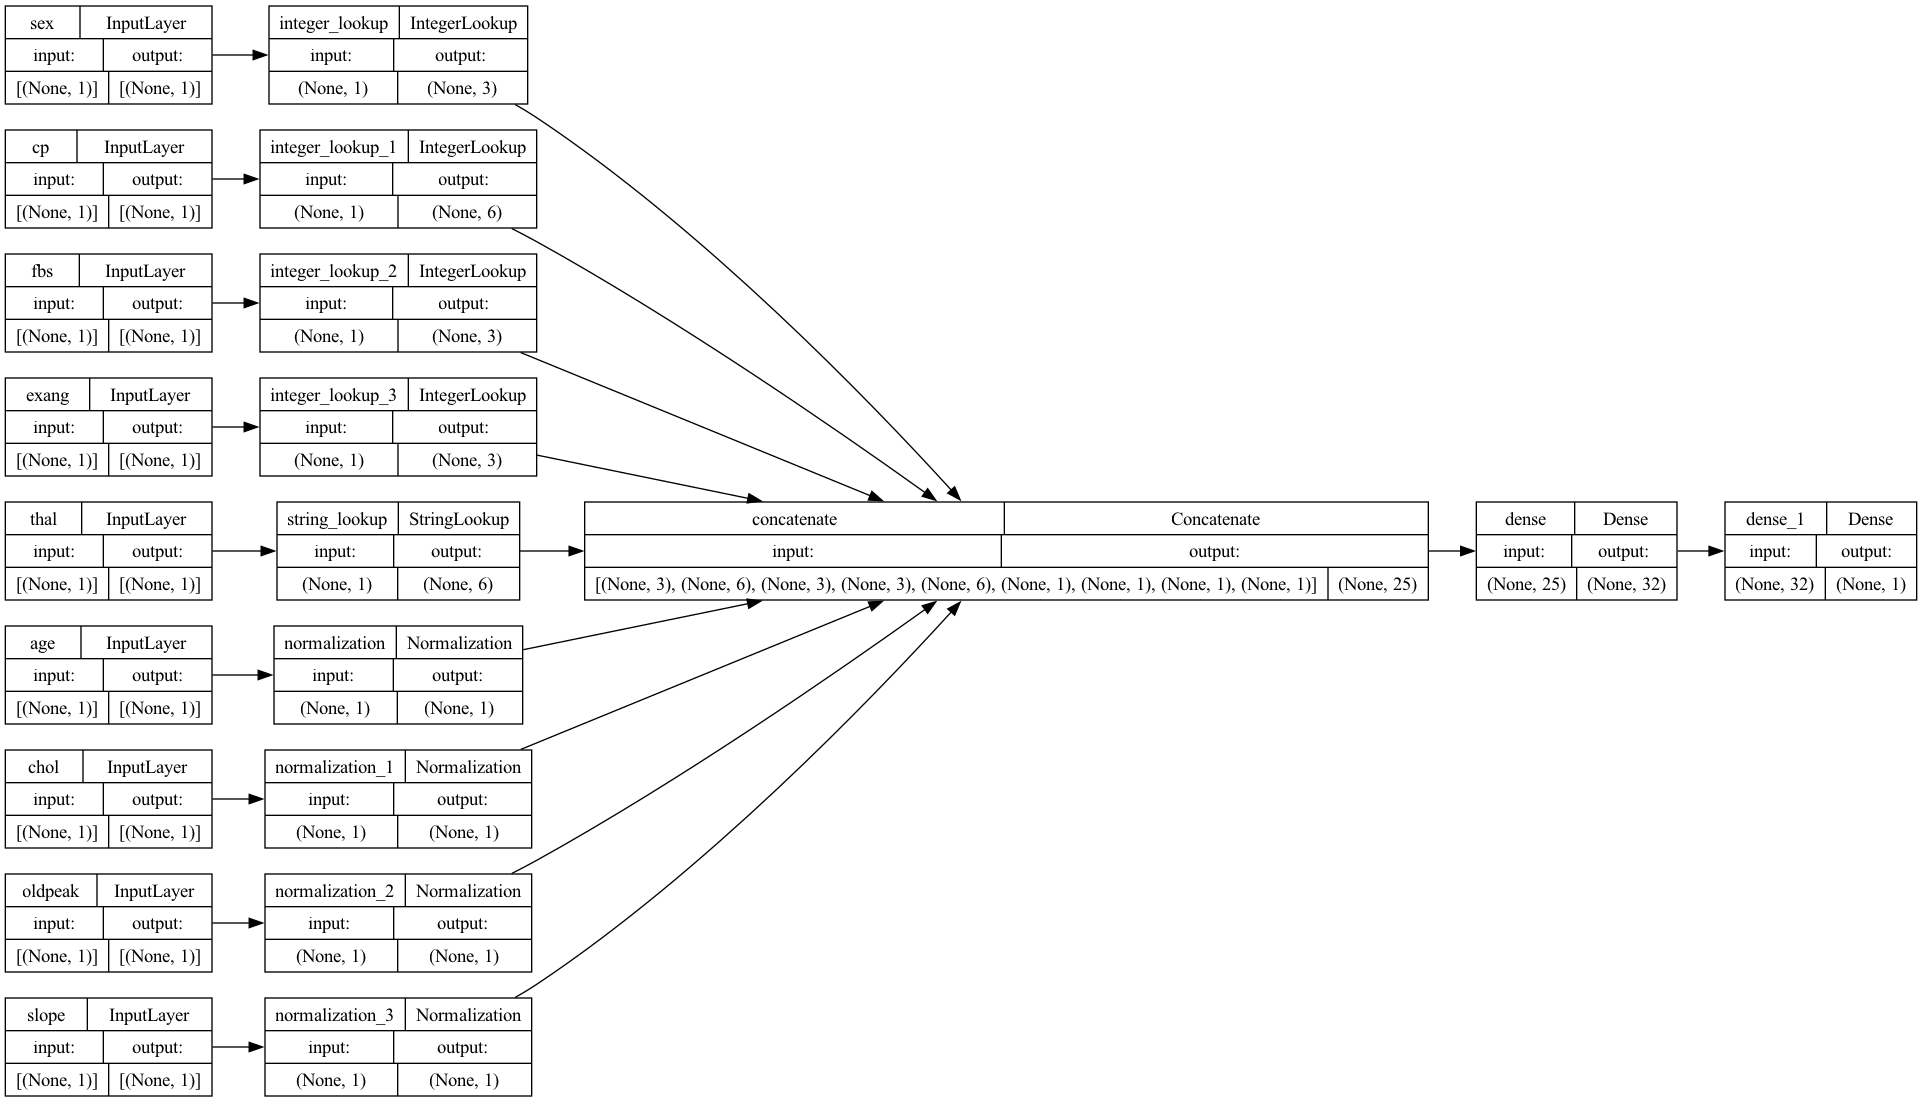

In [48]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Aseguramos que Keras use TensorFlow como backend, para asegurar que el modelo pueda usar strings como entradas

In [49]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 exang (InputLayer)          [(None, 1)]                  0         []                            
                                                                                              

Entrenamos el modelo con los datos en el formato tf.Dataset

In [51]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 [==============================] - 2s 79ms/step - loss: 0.6630 - accuracy: 0.7320 - precision: 0.4444 - recall: 0.1600 - roc_auc: 0.4285 - val_loss: 0.6520 - val_accuracy: 0.7708 - val_precision: 0.6000 - val_recall: 0.2500 - val_roc_auc: 0.5556
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6232 - accuracy: 0.7526 - precision: 0.6000 - recall: 0.1200 - roc_auc: 0.4875 - val_loss: 0.6131 - val_accuracy: 0.7917 - val_precision: 0.7500 - val_recall: 0.2500 - val_roc_auc: 0.6308
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5899 - accuracy: 0.7629 - precision: 0.6667 - recall: 0.1600 - roc_auc: 0.5523 - val_loss: 0.5786 - val_accuracy: 0.8125 - val_precision: 1.0000 - val_recall: 0.2500 - val_roc_auc: 0.6968
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5601 - accuracy: 0.7577 - precision: 0.6154 - recall: 0.1600 - roc_auc: 0.6278 - val_loss: 0.5504 - val_accuracy: 0.8125 - val_precision: 0.8000 - 

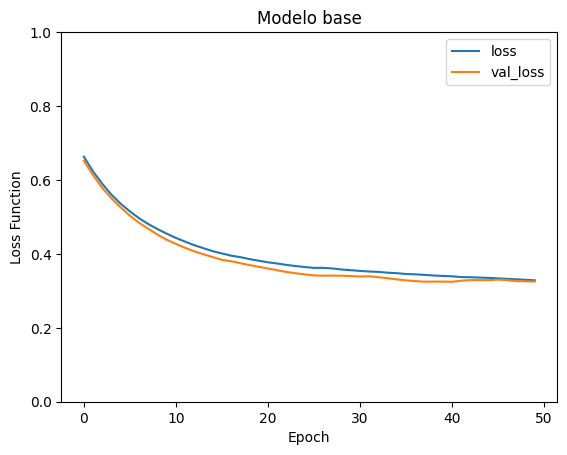

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.title("Modelo base")
plt.legend()

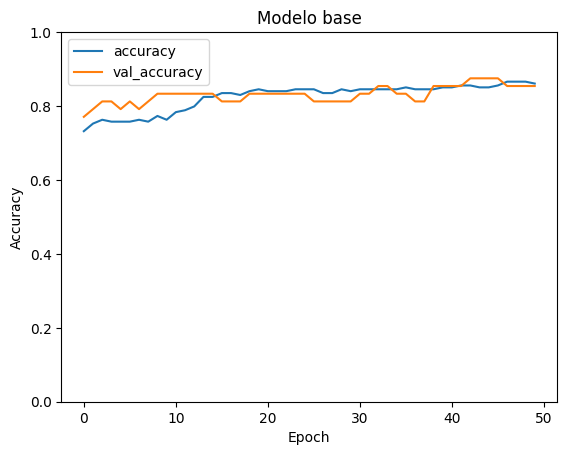

In [53]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Modelo base")
plt.legend()

In [54]:
results = model.evaluate(test_ds, verbose=0)

# Assuming you have the metric names as defined in `model.metrics_names`
print("Resultados para modelo base")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value}")

Resultados para modelo base
loss: 0.3941306471824646
accuracy: 0.7704917788505554
precision: 0.7058823704719543
recall: 0.5714285969734192
roc_auc: 0.9023809432983398


## Modelo con optimizador experimento 1

In [55]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [56]:
optimizer_exp1 = SGD(learning_rate=0.01, momentum=0.9)

In [57]:
model_exp1 = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [58]:
model_exp1.compile(optimizer=optimizer_exp1, loss='binary_crossentropy',  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='roc_auc')])


In [60]:
model_exp1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 exang (InputLayer)          [(None, 1)]                  0         []                            
                                                                                            

In [61]:
history_exp1 = model_exp1.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 [==============================] - 2s 77ms/step - loss: 0.3281 - accuracy: 0.8557 - precision_1: 0.7500 - recall_1: 0.6600 - roc_auc: 0.9107 - val_loss: 0.3245 - val_accuracy: 0.8542 - val_precision_1: 0.6667 - val_recall_1: 0.8333 - val_roc_auc: 0.9178
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.8660 - precision_1: 0.7609 - recall_1: 0.7000 - roc_auc: 0.9112 - val_loss: 0.3264 - val_accuracy: 0.8542 - val_precision_1: 0.6667 - val_recall_1: 0.8333 - val_roc_auc: 0.9144
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3267 - accuracy: 0.8660 - precision_1: 0.7500 - recall_1: 0.7200 - roc_auc: 0.9107 - val_loss: 0.3330 - val_accuracy: 0.8542 - val_precision_1: 0.6471 - val_recall_1: 0.9167 - val_roc_auc: 0.9167
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.8608 - precision_1: 0.7447 - recall_1: 0.7000 - roc_auc: 0.9130 - val_loss: 0.3317 - val_accuracy: 0.854

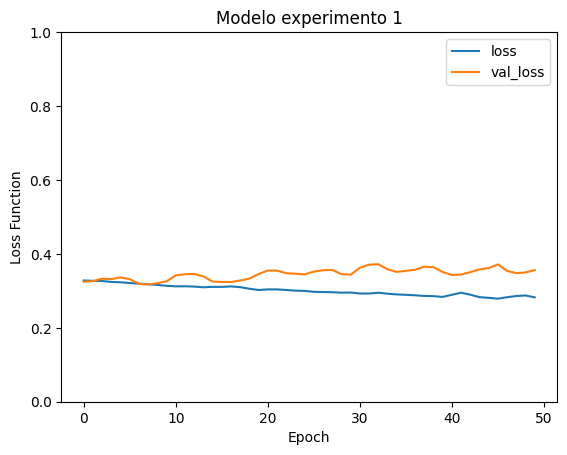

In [62]:
import matplotlib.pyplot as plt
plt.plot(history_exp1.history['loss'], label='loss')
plt.plot(history_exp1.history['val_loss'], label='val_loss')
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.title("Modelo experimento 1")
plt.legend()

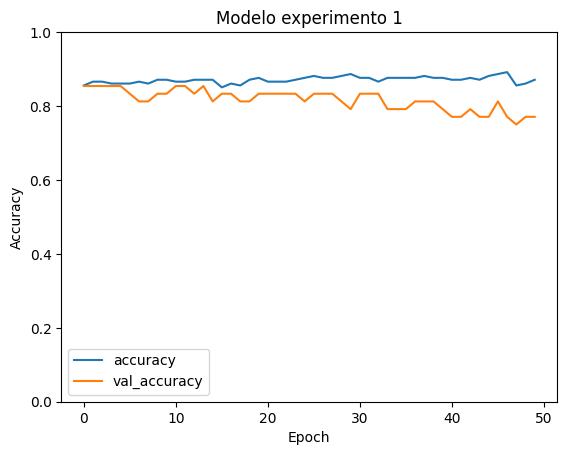

In [63]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_exp1.history['accuracy'],label='accuracy')
plt.plot(history_exp1.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Modelo experimento 1")
plt.legend()

In [64]:
results_exp1 = model_exp1.evaluate(test_ds, verbose=0)

# Assuming you have the metric names as defined in `model.metrics_names`
print("Resultados para experimento 1")
for name, value in zip(model_exp1.metrics_names, results_exp1):
    print(f"{name}: {value}")

Resultados para experimento 1
loss: 0.41821739077568054
accuracy: 0.7540983557701111
precision_1: 0.6875
recall_1: 0.523809552192688
roc_auc: 0.8910714387893677


## Modelo con optimizador experimento 2

In [65]:
optimizer_exp2 = RMSprop(learning_rate=0.001)

In [66]:
model_exp2 = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [67]:
model_exp2.compile(optimizer=optimizer_exp2, loss='binary_crossentropy',  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='roc_auc')])


In [68]:
model_exp2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 exang (InputLayer)          [(None, 1)]                  0         []                            
                                                                                            

In [69]:
history_exp2 = model_exp2.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


7/7 [==============================] - 1s 72ms/step - loss: 0.2812 - accuracy: 0.8763 - precision_2: 0.8095 - recall_2: 0.6800 - roc_auc: 0.9383 - val_loss: 0.3612 - val_accuracy: 0.7708 - val_precision_2: 0.5294 - val_recall_2: 0.7500 - val_roc_auc: 0.8877
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.8866 - precision_2: 0.8182 - recall_2: 0.7200 - roc_auc: 0.9401 - val_loss: 0.3600 - val_accuracy: 0.7708 - val_precision_2: 0.5294 - val_recall_2: 0.7500 - val_roc_auc: 0.8889
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2763 - accuracy: 0.8763 - precision_2: 0.8095 - recall_2: 0.6800 - roc_auc: 0.9413 - val_loss: 0.3667 - val_accuracy: 0.7917 - val_precision_2: 0.5556 - val_recall_2: 0.8333 - val_roc_auc: 0.8866
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2740 - accuracy: 0.8866 - precision_2: 0.8182 - recall_2: 0.7200 - roc_auc: 0.9410 - val_loss: 0.3665 - val_accuracy: 0.7708 - val_pre

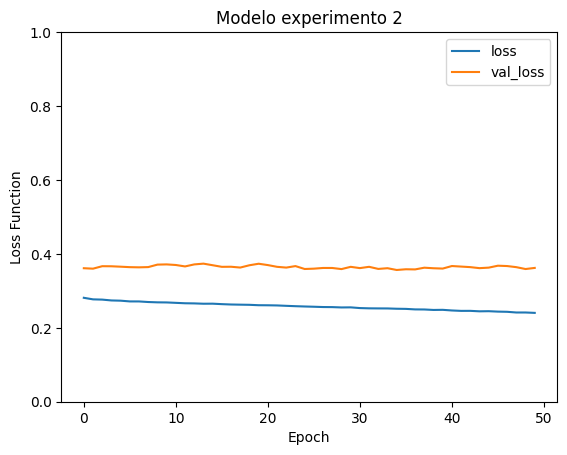

In [70]:
import matplotlib.pyplot as plt
plt.plot(history_exp2.history['loss'], label='loss')
plt.plot(history_exp2.history['val_loss'], label='val_loss')
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.title("Modelo experimento 2")
plt.legend()

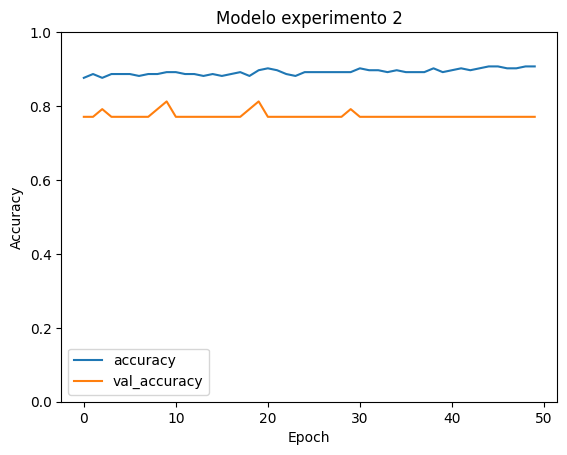

In [71]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_exp2.history['accuracy'],label='accuracy')
plt.plot(history_exp2.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Modelo experimento 2")
plt.legend()

In [72]:
results_exp2 = model_exp2.evaluate(test_ds, verbose=0)

# Assuming you have the metric names as defined in `model.metrics_names`
print("Resultados para experimento 2")
for name, value in zip(model_exp2.metrics_names, results_exp2):
    print(f"{name}: {value}")

Resultados para experimento 2
loss: 0.43132245540618896
accuracy: 0.7377049326896667
precision_2: 0.6470588445663452
recall_2: 0.523809552192688
roc_auc: 0.8916666507720947


## Punto 5

## Modelo Experimento 5

In [73]:
model_layers_exp5 = keras.layers.Dense(64, activation='relu')(all_feats)

Agregamos la capa de salida con 1 neurona (probabilidad de sufrir la enfermedad cardiada) y función de activación sigmoide

In [74]:
model_layers_exp5 = keras.layers.Dense(1, activation='sigmoid')(model_layers_exp5)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [75]:
model_exp5 = keras.Model(inputs, model_layers_exp5)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [76]:
model_exp5.compile(optimizer='adam', loss='binary_crossentropy',  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='roc_auc')])


In [77]:
model_exp5.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 exang (InputLayer)          [(None, 1)]                  0         []                            
                                                                                            

Entrenamos el modelo con los datos en el formato tf.Dataset

In [78]:
history_exp5 = model_exp5.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 [==============================] - 2s 86ms/step - loss: 0.7386 - accuracy: 0.4072 - precision_3: 0.2848 - recall_3: 0.8600 - roc_auc: 0.6501 - val_loss: 0.6899 - val_accuracy: 0.6042 - val_precision_3: 0.3704 - val_recall_3: 0.8333 - val_roc_auc: 0.6968
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6495 - precision_3: 0.3875 - recall_3: 0.6200 - roc_auc: 0.7099 - val_loss: 0.6174 - val_accuracy: 0.6667 - val_precision_3: 0.4000 - val_recall_3: 0.6667 - val_roc_auc: 0.7431
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5908 - accuracy: 0.7835 - precision_3: 0.5833 - recall_3: 0.5600 - roc_auc: 0.7771 - val_loss: 0.5636 - val_accuracy: 0.7500 - val_precision_3: 0.5000 - val_recall_3: 0.4167 - val_roc_auc: 0.8067
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5451 - accuracy: 0.7990 - precision_3: 0.6410 - recall_3: 0.5000 - roc_auc: 0.8077 - val_loss: 0.5223 - val_accuracy: 0.750

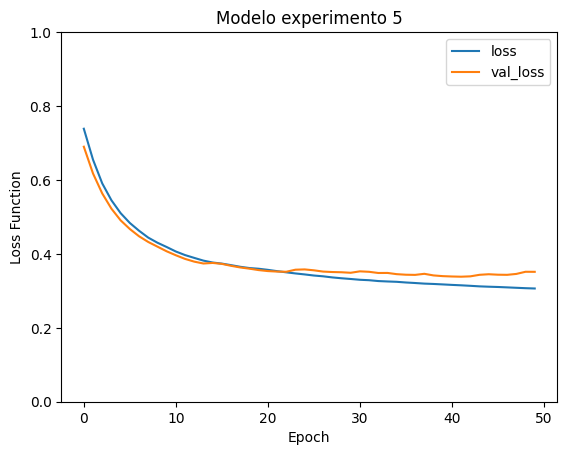

In [79]:
import matplotlib.pyplot as plt
plt.plot(history_exp5.history['loss'], label='loss')
plt.plot(history_exp5.history['val_loss'], label='val_loss')
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.title("Modelo experimento 5")
plt.legend()

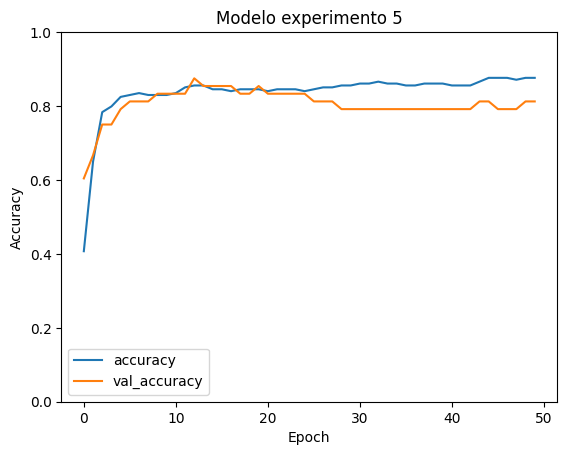

In [80]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_exp5.history['accuracy'],label='accuracy')
plt.plot(history_exp5.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Modelo experimento 5")
plt.legend()

In [81]:
results_exp5 = model_exp5.evaluate(test_ds, verbose=0)

# Assuming you have the metric names as defined in `model.metrics_names`
print("Resultados para modelo experimento 5")
for name, value in zip(model_exp5.metrics_names, results_exp5):
    print(f"{name}: {value}")

Resultados para modelo experimento 5
loss: 0.39773741364479065
accuracy: 0.7704917788505554
precision_3: 0.7058823704719543
recall_3: 0.5714285969734192
roc_auc: 0.9071428775787354


# Modelo experimento 6

In [82]:
model_layers_exp6 = keras.layers.Dense(18, activation='relu')(all_feats)

Agregamos la capa de salida con 1 neurona (probabilidad de sufrir la enfermedad cardiada) y función de activación sigmoide

In [83]:
model_layers_exp6 = keras.layers.Dense(1, activation='sigmoid')(model_layers_exp6)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [84]:
model_exp6 = keras.Model(inputs, model_layers_exp6)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [85]:
model_exp6.compile(optimizer='adam', loss='binary_crossentropy',  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='roc_auc')])


In [86]:
model_exp6.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 exang (InputLayer)          [(None, 1)]                  0         []                            
                                                                                            

Entrenamos el modelo con los datos en el formato tf.Dataset

In [87]:
history_exp6 = model_exp6.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 [==============================] - 1s 72ms/step - loss: 0.7739 - accuracy: 0.3299 - precision_4: 0.1721 - recall_4: 0.4200 - roc_auc: 0.2850 - val_loss: 0.7182 - val_accuracy: 0.4375 - val_precision_4: 0.2000 - val_recall_4: 0.4167 - val_roc_auc: 0.4803
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7414 - accuracy: 0.3351 - precision_4: 0.1504 - recall_4: 0.3400 - roc_auc: 0.3283 - val_loss: 0.6904 - val_accuracy: 0.4792 - val_precision_4: 0.2174 - val_recall_4: 0.4167 - val_roc_auc: 0.5799
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.7142 - accuracy: 0.4278 - precision_4: 0.1919 - recall_4: 0.3800 - roc_auc: 0.3734 - val_loss: 0.6651 - val_accuracy: 0.5625 - val_precision_4: 0.3043 - val_recall_4: 0.5833 - val_roc_auc: 0.6620
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.4897 - precision_4: 0.2048 - recall_4: 0.3400 - roc_auc: 0.4368 - val_loss: 0.6409 - val_accuracy: 0.666

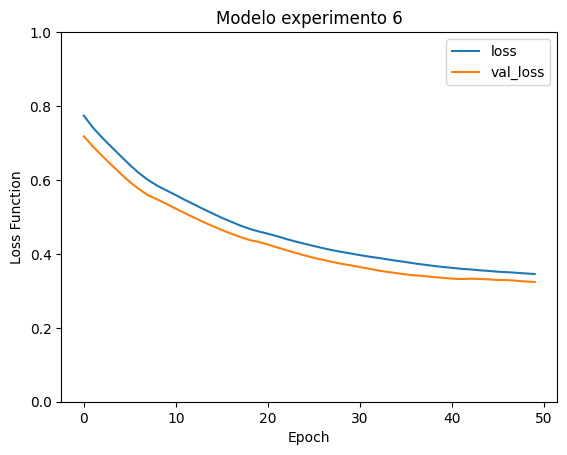

In [88]:
import matplotlib.pyplot as plt
plt.plot(history_exp6.history['loss'], label='loss')
plt.plot(history_exp6.history['val_loss'], label='val_loss')
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.title("Modelo experimento 6")
plt.legend()

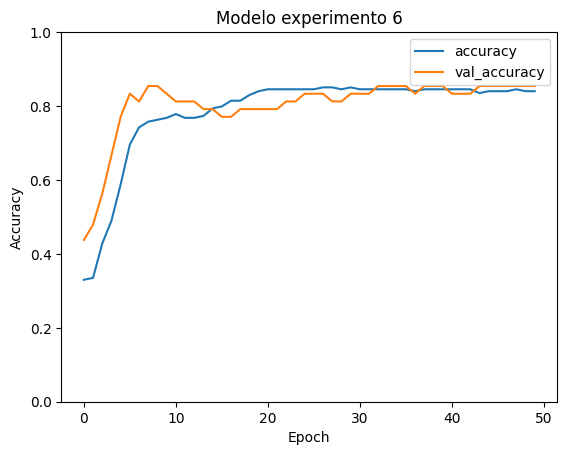

In [89]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_exp6.history['accuracy'],label='accuracy')
plt.plot(history_exp6.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Modelo experimento 6")
plt.legend()

In [90]:
results_exp6 = model_exp6.evaluate(test_ds, verbose=0)

# Assuming you have the metric names as defined in `model.metrics_names`
print("Resultados para modelo experimento 6")
for name, value in zip(model_exp6.metrics_names, results_exp6):
    print(f"{name}: {value}")

Resultados para modelo experimento 6
loss: 0.4008972942829132
accuracy: 0.7704917788505554
precision_4: 0.7058823704719543
recall_4: 0.5714285969734192
roc_auc: 0.9071428775787354


# Modelo experimento 7

In [91]:
model_layers_exp7 = keras.layers.Dense(120, activation='relu')(all_feats)

Agregamos la capa de salida con 1 neurona (probabilidad de sufrir la enfermedad cardiada) y función de activación sigmoide

In [92]:
model_layers_exp7 = keras.layers.Dense(1, activation='sigmoid')(model_layers_exp7)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [93]:
model_exp7 = keras.Model(inputs, model_layers_exp7)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [94]:
model_exp7.compile(optimizer='adam', loss='binary_crossentropy',  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='roc_auc')])


In [95]:
model_exp7.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 exang (InputLayer)          [(None, 1)]                  0         []                            
                                                                                            

Entrenamos el modelo con los datos en el formato tf.Dataset

In [96]:
history_exp7 = model_exp7.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
7/7 [==============================] - 2s 96ms/step - loss: 0.6448 - accuracy: 0.6856 - precision_5: 0.0769 - recall_5: 0.0200 - roc_auc: 0.4142 - val_loss: 0.5802 - val_accuracy: 0.7500 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_roc_auc: 0.6620
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5814 - accuracy: 0.7423 - precision_5: 0.5000 - recall_5: 0.0200 - roc_auc: 0.6411 - val_loss: 0.5261 - val_accuracy: 0.7500 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_roc_auc: 0.8495
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5338 - accuracy: 0.7474 - precision_5: 1.0000 - recall_5: 0.0200 - roc_auc: 0.7849 - val_loss: 0.4877 - val_accuracy: 0.7500 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_roc_auc: 0.8843
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4967 - accuracy: 0.7423 - precision_5: 0.5000 - recall_5: 0.0200 - roc_auc: 0.8508 - val_loss: 0.45

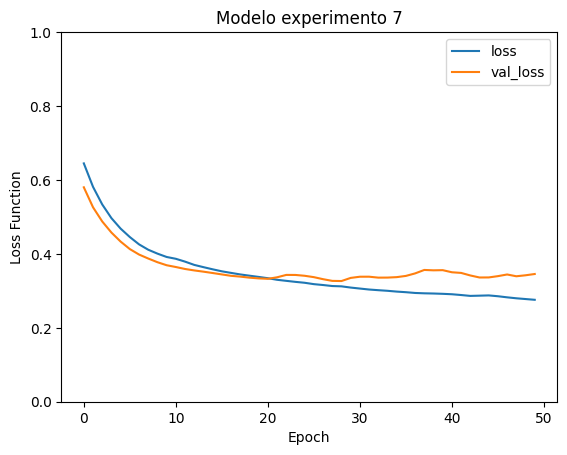

In [97]:
import matplotlib.pyplot as plt
plt.plot(history_exp7.history['loss'], label='loss')
plt.plot(history_exp7.history['val_loss'], label='val_loss')
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.title("Modelo experimento 7")
plt.legend()

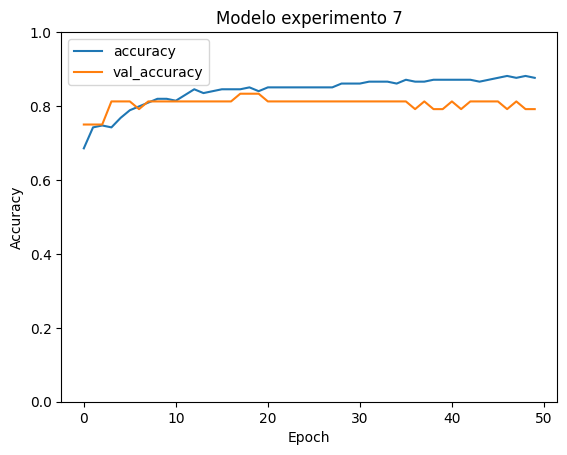

In [98]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_exp7.history['accuracy'],label='accuracy')
plt.plot(history_exp7.history['val_accuracy'],label='val_accuracy')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Modelo experimento 7")
plt.legend()

In [100]:
results_exp7 = model_exp7.evaluate(test_ds, verbose=0)

# Assuming you have the metric names as defined in `model.metrics_names`
print("Resultados para modelo experimento 7")
for name, value in zip(model_exp7.metrics_names, results_exp7):
    print(f"{name}: {value}")

Resultados para modelo experimento 7
loss: 0.4105969965457916
accuracy: 0.7540983557701111
precision_5: 0.6875
recall_5: 0.523809552192688
roc_auc: 0.901190459728241
